# 線形回帰モデル

 気温から消費者がアイスクリームにかける支出額を予測する機械学習モデルを作成する。

## データの読み込み

In [131]:
%matplotlib inline
import numpy as np
import pandas as pd
#気象庁が発表している東京都の2017年～2021年の月別平均気温のデータを読み込む
kion = pd.read_csv('tokyo_kion_5_data.csv', encoding="utf-8")
kion

,年,月,平均気温
0,2017,1,6
1,2017,2,7
2,2017,3,9
3,2017,4,15
4,2017,5,20
5,2017,6,22
6,2017,7,27
7,2017,8,26
8,2017,9,23
9,2017,10,17


In [132]:
#日本アイスクリーム協会が発表している東京都の2017年～2021年の月別のアイスに対する家計別支出額ノデータを読み込む
ice = pd.read_csv('ice_tokyo_sisyutugaku_data.csv', encoding="utf-8")
ice

,年,月,家計別支出額
0,2017,1,489
1,2017,2,382
2,2017,3,472
3,2017,4,624
4,2017,5,915
5,2017,6,914
6,2017,7,1394
7,2017,8,1370
8,2017,9,826
9,2017,10,599


## データの前処理

In [133]:
#データを結合、mergeはデフォルトでouterなので、今回はhowを設定しなくてよい
df = pd.merge(kion, ice)
df

,年,月,平均気温,家計別支出額
0,2017,1,6,489
1,2017,2,7,382
2,2017,3,9,472
3,2017,4,15,624
4,2017,5,20,915
5,2017,6,22,914
6,2017,7,27,1394
7,2017,8,26,1370
8,2017,9,23,826
9,2017,10,17,599


## 線形回帰モデルの作成、学習

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x = df['平均気温']
#sklearnのfit()では、第一引数のXには、DataFrame型やnumpyの行列形式のみを受け付けているので、Xの形状を1D配列から2D配列に直す。ここでｘが1D形式になっている事に気付かず、エラーが発生し少し時間がかかった
X = np.array(x).reshape(-1,1)
y = df ['家計別支出額']

X_train, X_test, y_train ,y_test =train_test_split(X, y,train_size=0.8)

model =  LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## 決定係数

In [193]:
#過学習していないか精度の検証で確認
print (model.score(X_train,y_train))
print (model.score(X_test,y_test))

0.8281951361131358
0.8131172460263212


精度にあまり差がないので過学習はしていなさそう。

## モデル

In [194]:
#1行目でインプット関数で気温を入力でるようにし、2行目で入力データの形状をsklearnに対応する形に直している
x1 = input()
x2 = np.array(x1).reshape(-1,1)
model.predict(x2)

20


C:\Users\kojih\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([968.76907407])

## グラフ化

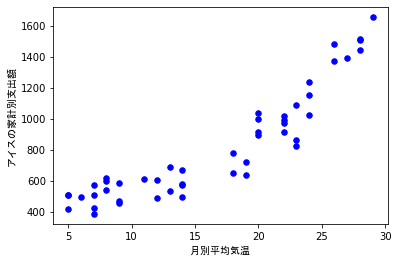

In [197]:
plt.scatter(X_train, y_train, c='blue', s=30)
#fontname ='MS Gothic'にする事で軸ラベルに日本語を適用できるようにする
plt.xlabel('月別平均気温', fontname ='MS Gothic')
plt.ylabel('アイスの家計別支出額', fontname ='MS Gothic')
plt.show()

## 考察、気付き

考察<br>今回の調査だけでは、気温が高くなると消費者が単位あたりの値段の高いアイスクリームを買っているという可能性が0ではないので、一概には言い切れないが、気温が高くなると消費者のアイスクリームを消費する量が増えると言えそうである。


気付き<br>今回モデルを作成するに当たり、データをどのように集めるかに困り、データ収集の大変さを学んだ。



## 参考URL

家計調査実績（日本）｜データで見るアイスクリーム(https://www.icecream.or.jp/iceworld/data/expenditures.html)<br>気象庁 Japan Meteorological Agency(https://www.jma.go.jp/jma/index.html)
